
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

This is clearly a classification problem.Because here our aim is to create a model that predicts whether a student pass their high school final exam, and specifically it is a binary classification problem.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read student data
data=pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [4]:
# Calculate number of students
n_students=data.shape[0]
n_students

395

There are 395 students in this dataset.

In [36]:
# Calculate number of features
n_features=data.shape[1]
n_features

31

There are 31 features in this dataset.

In [37]:
# Calculate passing students
n_passed = data['passed'].value_counts()["yes"]
n_passed

265

265 students passed the final exam.

In [38]:
# Calculate failing students
n_failed = data['passed'].value_counts()["no"]
n_failed

130

130 students failed in the final exam.

In [39]:
# Calculate graduation rate
grad_rate=((data['passed']=='yes').sum())/(data.shape[0])*100
grad_rate

67.08860759493672

In [40]:
# Print the results
print('The number of students = ',n_students)
print('The number of features = ',n_features)
print('The number of students passed = ',n_passed)
print('The number of students failed = ',n_failed)
print('The graduation rate = ',grad_rate)

The number of students =  395
The number of features =  31
The number of students passed =  265
The number of students failed =  130
The graduation rate =  67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

There are no missing values in this dataset.

In [10]:
# Extract feature columns

In [11]:
data.drop(['passed','reason'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [12]:
# Extract target column 'passed'

In [13]:
data['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [14]:
# Separate the data into feature data and target data (X and y, respectively)

In [15]:
X=data.drop(['passed','reason'],axis=1)
y=data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [16]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in X[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]:
    X[i]=label_en.fit_transform(X[i])
    
y=label_en.fit_transform(y)
y=pd.DataFrame(y)
y = y.rename(columns={0:'passed'})

In [18]:
X1=pd.get_dummies(X[['Mjob','Fjob','guardian']])

#concat data frames X and X1
X=pd.concat([X,X1], axis=1)
X=X.drop(['Mjob','Fjob','guardian'],axis=1)

In [19]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,0,0,1,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,0,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,0,1,0,0,1,0,0


In [20]:
y.head()

,passed
0,0
1,0
2,1
3,1
4,1


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.24)

In [22]:
# Show the results of the split
print('shape of X_train is :',X_train.shape)
print('shape of y_train is :',y_train.shape)
print('shape of X_test is :',X_test.shape)
print('shape of y_test is :',y_test.shape)

shape of X_train is : (300, 39)
shape of y_train is : (300, 1)
shape of X_test is : (95, 39)
shape of y_test is : (95, 1)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

### explaination
1-Logistic Regression-:

Logistic regression is a machine learning method used in the classification problem when you need to distinguish one class from another. Sigmoid is an activation function for logistic regression. Logistic regression is easier to implement, interpret, and very efficient to train. It makes no assumptions about distributions of classes in feature space. But if the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. 
Since it is easier to implement, interpret, and very efficient to train, we choose this model.

2-kNN-:

kNN is one of the most basic yet essential classification algorithms in machine learning. It finds intense applications in pattern recognition, data mining and is widely disposible in real life scenarios, since it is non parametric. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm. It does not work well with large dataset and sensitive to noisy data, missing values and outliers.
Since it is easier to implement and it finds intense applications in pattern recognition, so we choose this model.

3-Random Forest-:

It is an ensemble of decision tree algorithm. A random forest produces good predictions that can be understood easily. It can handle large datasets efficiently. The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm. The main limitation of random forest is that a large number of trees can make the algorithm too slow and ineffective for real-time predictions.
Since it provides a higher level of accuracy in predicting outcomes, we choose this model.

In [23]:
# Import the three supervised learning models from sklearn

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression()

#KNN 
from sklearn.neighbors import KNeighborsClassifier

#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()


In [25]:
# fit model-1  on traning data 
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [26]:
# predict on the test data 

In [27]:
y_pred = logistic_model.predict(X_test)

In [28]:
# calculate the accuracy score

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy of logistic regression model is :",accuracy_score(y_test,y_pred))

Accuracy of logistic regression model is : 0.7052631578947368


In [30]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

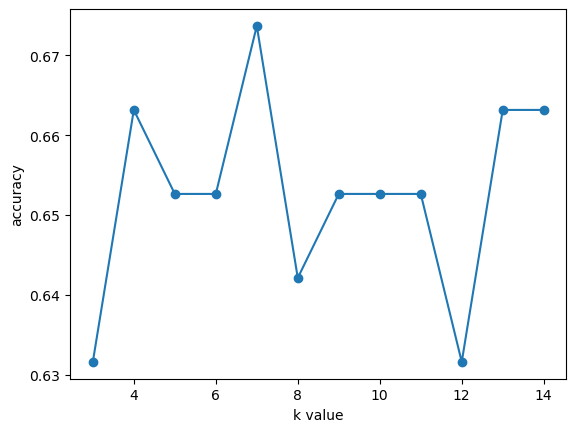

In [31]:
#kNN
acc_scores = []
#to find optimum k value, we have to use varied k values
neighbors = np.arange(3,15)
#creating a loop for each KNN values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

#checking for which k value we got highest accuracy
plt.plot(neighbors,acc_scores,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

In [32]:
#replace k as 7
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy of kNN model is :",accuracy_score(y_test,y_pred))

Accuracy of kNN model is : 0.6631578947368421


In [33]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [34]:
#random forest
rf_model.fit(X_train,y_train)
#testing the model
y_pred = rf_model.predict(X_test)

In [35]:
print("Accuracy of random forest model is :",accuracy_score(y_test,y_pred))

Accuracy of random forest model is : 0.6947368421052632
